In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [2]:
# Read the data_set...
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:

# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']


In [4]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))



In [5]:

# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}



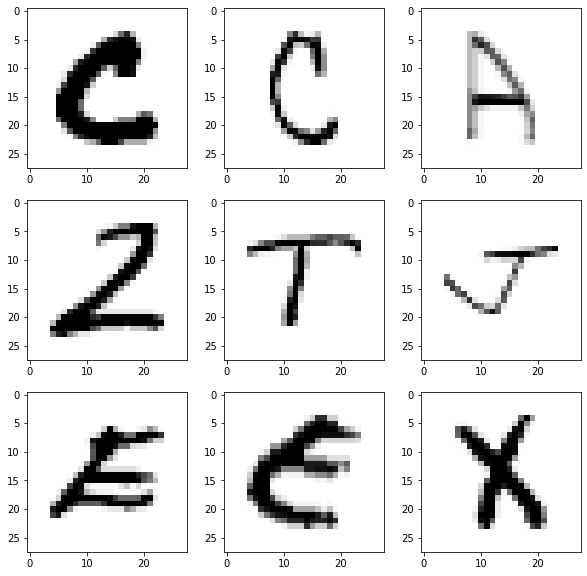

In [6]:


#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [7]:

#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')


In [8]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



In [9]:

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')




history=model.fit(train_X, train_yOHE, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


model.summary()
model.save(r'model_hand.h5')

Epoch 1/10
9312/9312 [==============================] - 301s 32ms/step - loss: 0.1624 - accuracy: 0.9565 - val_loss: 0.0828 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 2/10
9312/9312 [==============================] - 253s 27ms/step - loss: 0.0726 - accuracy: 0.9796 - val_loss: 0.0731 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 3/10
9312/9312 [==============================] - 229s 25ms/step - loss: 0.0614 - accuracy: 0.9834 - val_loss: 0.0634 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 4/10
9312/9312 [==============================] - 218s 23ms/step - loss: 0.0555 - accuracy: 0.9851 - val_loss: 0.0574 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 5/10
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0517 - accuracy: 0.9865 - val_loss: 0.0662 - val_accuracy: 0.9841 - lr: 0.0010
Epoch 6/10
9312/9312 [==============================] - 293s 31ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0380 - val_accuracy: 0.9913 - lr: 2.0000e-04
Epoch 7/10
9312/9312 [==============